In [58]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets, transforms
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import numpy
from torchsummary import summary
from torch.utils.data import Dataset

import matplotlib.pyplot as plt
import os
from PIL import Image
import random
from torch.utils.data import DataLoader

import os 
import torch
import numpy as np
import re 

In [59]:
# Calculating the average height and width of the dataset provided
# Note - The pdf has been converted into JPEGs 

total_h = 0
total_w = 0
count = 0
folder_path = '/Users/sarthakkapila/Desktop/Dataset-espanol/train'

for filename in os.listdir(folder_path):
    if filename.endswith('.jpeg'):
        filepath = os.path.join(folder_path, filename)
        
        with Image.open(filepath) as img:
            h, w = img.size
            total_w += w
            total_h += h
            count += 1 

avg_w = total_w // count
avg_h = total_h // count

print("avg. width ->", avg_w)
print("avg. height ->", avg_h)

avg. width -> 580
avg. height -> 770


In [ ]:
# We will use the average dimensions of the images

In [87]:
class ImageTextDataset(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.image_paths = [f"{data_dir}/{f}" for f in os.listdir(data_dir) if f.endswith(".jpeg")]
        self.text_paths = [f.replace(".jpeg", ".txt") for f in self.image_paths] 

    def __len__(self):
        return len(self.image_paths)
        return len(self.text_paths)


    def __getitem__(self, idx):
        
        image_path = self.image_paths[idx]
        text_path = self.text_paths[idx]

# preprocess image
        image = Image.open(image_path)
        transform = transforms.Compose([transforms.Resize((580, 770)),
        transforms.ToTensor(), 
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  
        ]) 
        
        image = transform(image)

# preprocess text
        with open(text_path, 'r') as f:
            text = f.read().strip()

        return image, text


data_dir = "/Users/sarthakkapila/Desktop/Dataset-espanol/train"
# data_dir_eval = "/Users/sarthakkapila/Desktop/Dataset-espanol/test"

dataset = ImageTextDataset(data_dir)
dataloader = DataLoader(dataset, batch_size=13, shuffle=True)

# dataset_eval = ImageTextDataset(data_dir_eval)
# dataloader_eval = DataLoader(dataset_eval, batch_size=1, shuffle=True)

In [88]:
CHARS = " (),-.:;<ABCDEFGHIJLMNOPQRSTUVYabcdefghijlmnopqrstuvxyzáéíñóú"


def text_to_char_ids(text, char_to_id, max_length):
    char_ids = [char_to_id.get(char, char_to_id['<unk>']) for char in text]
    padded_char_ids = char_ids[:max_length] + [char_to_id['<pad>']] * (max_length - len(char_ids))
    return padded_char_ids

char_to_id = {'<pad>': 0, '<unk>': 1} 
for char in CHARS:
    char_to_id[char] = len(char_to_id)


# char_ids = text_to_char_ids(text, char_to_id, max_length)

# tensor_text = torch.tensor(char_ids)




char_to_index = {char: index for index, char in enumerate(CHARS)}
index_to_char = {index: char for char, index in char_to_index.items()}

# def text_to_tensor(text, max_length):
#     tensor = torch.zeros(max_length, dtype=torch.long)
#     for i, char in enumerate(text):
#         if i >= max_length:
#             break
#         tensor[i] = char_to_index.get(char, 0)  # Use index 0 for unknown characters
#     return tensor

def tensor_to_text(tensor):
    text = ""
    for index in tensor:
        if index.item() == 0:  
            break
        text += index_to_char.get(index.item(), '?')  
    return text

max_length = 25
# text_data = "sa de immortal, que a los mortales \ntoque. Para que conozcays pues, \nque es la virtud de que aqui os ha-\nblo en general (remitiendo para \nadelante lo particular) dize Aristo-\nteles, que es un habito para elegir \nlo recto, el qual haze bueno al hom-\nbre y sus obras, y segun la difinen \nSan Agustin, y Santo Thomas; es \nuna qualidad del alma, con que se \nvive rectamente, y la que yo creo \nos condederá nuestro Señor, obli-\ngándole con pidírsela, y disponer-\nos de vuestra parte; assi sea como \nyo desseo, y que os de larga \nvida para grangear \nen ella mucha \ngloria. \nConsejos que dexó la dicha \nSeñora a su hijo \nPrimogénito.\nNo de los enga-\nños injustamente \nmás recibidos en \nel mundo, es creer, \nque los bienes na\nturales, en que al-\ngunos por privilegio nacen here-\ndados, son para vivir mas licencio-\nsamente con solo estima propia, y \ndesprecio de los otros, con super-\nfluos regalos, y soberania tiranica, \nentregandose de tal suerte a todo \ngenero de vicios, que estos tengan \ncampal guerra, sobre ser cada uno \nel mayor. Y assi, si bien ay algunos \ngrandes Señores, que conocen ser \nla verdadera calidad de la Virtud, y la \nmayor, no la heredada, sino la pro-',"

input_size = len(CHARS)
output_size = len(CHARS)+1
output_size, max_length

(62, 25)

In [ ]:
# for i ,(images, labels) in enumerate(dataloader):
#     # Get the text from the tuple
# #     print(labels)
    
#     char_ids = text_to_char_ids(labels[i], char_to_id, max_length)
#     input_tensor = torch.tensor(char_ids)
# #     print(char_ids)
#     print(input_tensor, input_tensor.shape)  # shape should be 13,25
# #     print(images)


In [ ]:
# for images, labels in dataloader:
#     print(len(labels))
    
#     # Initialize an empty tensor to store the processed data
#     label_tensor = torch.zeros(13, max_length, dtype=torch.float)
# #     print(images)
# #     print(labels)
# #     for i, label in enumerate(labels):
#     char_ids = text_to_char_ids(labels, char_to_id, max_length)
#     label_tensor = torch.tensor(char_ids)
        
#     print(label_tensor)
# #     print(label_tensor.shape)
    


In [ ]:
# label_tensor

In [ ]:
# for images, labels in dataloader:
#     # Get the text from the tuple
#     labels = ''.join(labels)

# # Remove forward slashes
#     labelss = labels.replace('/n', '')
# #     labels[i]= labels[i].replace('/n', '')
#     print(labelss)

# #     char_ids = text_to_char_ids(labels[i], char_to_id, max_length)
# #     input_tensor = torch.tensor(char_ids)
# #     print(char_ids)

# #     print(input_tensor, input_tensor.shape)
# #     print(images)
    
#     break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


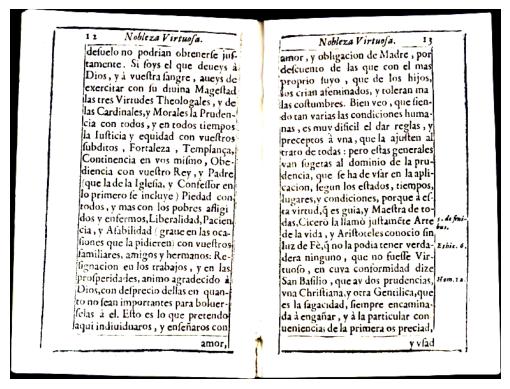

In [75]:
# Displaying 

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

images,labels = next(iter(dataloader))
imshow(images[0]);


In [ ]:
# Convolutional Recurrent Neural Network (CRNN) architecture

In [76]:
def calcconv(h,w,p,k,s):
    output_h = (h + 2*p - k)//s + 1
    output_w = (w + 2*p - k)//s + 1
    
    print(output_h,output_w)

    

def calc_maxpool(h, w, k, s):
    output_h = (h - k) // s + 1
    output_w = (w - k) // s + 1
    
    print(output_h, output_w)
    
calcconv(580,770,1,3,1)
calc_maxpool(290,385,2,2)


# avg. width -> 192
# avg. height -> 145

580 770
145 192


In [89]:
# 1,3,580,770
batch_size = 25
class ConvRNN(nn.Module):
    def __init__(self, num_classes):
        super(ConvRNN, self).__init__()

        # Activation function
        self.relu = nn.LeakyReLU(0.2, inplace=True)
        self.sig = nn.Sigmoid()

        # Convolutional layers
        self.conv_1 = nn.Conv2d(3, 64, kernel_size=3, padding=1, stride=1)
        self.pool_1 = nn.MaxPool2d((2, 2), stride=2)    # 290, 770
        self.bn_1 = nn.BatchNorm2d(64)

#         self.conv_2 = nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=1) 
#         self.pool_2 = nn.MaxPool2d((2, 2), stride=2)   # 145, 192
        
        self.conv_3 = nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=1)

#         self.conv_4 = nn.Conv2d(256, 256, kernel_size=3, padding=1, stride=1)
#         self.pool_4 = nn.MaxPool2d((2, 2), stride=2)   # 72, 96 -> CALCULATE
        
#         self.conv_5 = nn.Conv2d(256, 512, kernel_size=3, padding=1, stride=1)
#         self.bn_5 = nn.BatchNorm2d(256)

        self.conv_6 = nn.Conv2d(128, 256, kernel_size=3, padding=1, stride=1)
        self.bn_6 = nn.BatchNorm2d(256)
        self.pool_6 = nn.MaxPool2d((2, 2), stride=2)  # 36, 48 -> CALCULATE
        
        self.conv_7 = nn.Conv2d(256, 256, kernel_size=2, padding=1, stride=1)
        
        # Need squeezing        
        
        # Recurrent layers
        self.dense1 = nn.Linear(7213568, 64)

#         RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x256 and 128x256)

        self.rnn_1 = nn.LSTM(64, 128, num_layers=2, bidirectional=False, dropout=0.2, batch_first=True)
#         self.rnn_2 = nn.LSTM(256, 64, num_layers=2, bidirectional=True, dropout=0.2, batch_first=True)
        
        # Output layer
        self.dense2 = nn.Linear(128,25)
        


    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.pool_1(x)
        x = self.bn_1(x)


#         x = self.conv_2(x)
#         x = self.relu(x)
#         x = self.pool_2(x)

        x = self.conv_3(x)
        x = self.relu(x)

#         x = self.conv_4(x)
#         x = self.relu(x)
#         x = self.pool_4(x)

#         x = self.conv_5(x)
#         x = self.relu(x)
#         x = self.bn_5(x)

        x = self.conv_6(x)
        x = self.relu(x)
        x = self.pool_6(x)
        x = self.bn_6(x)
        
        x = self.conv_7(x)
#         print(x.shape)
        x = self.relu(x)
#         print(x.shape)

# # SQUEEZE
#         print(x.shape, "1")
#         x_squeezed = torch.squeeze(x)
#         print(x_squeezed.shape, "2")
#         x = x_squeezed
#         x = x.permute(0, 2, 1)

#         print(x.shape, "3")
        x = torch.flatten(x, 1)
#         print(x.shape)
        x = self.dense1(x)
#         print(x.shape)
        x = self.relu(x)

        x, _ = self.rnn_1(x)
#         x, _ = self.rnn_2(x)

        x = self.dense2(x)
#         x = x.view(-1, 1750, max_length)
#         x = torch.squeeze(x, dim=0)

        return x

In [90]:
batch_size = 13
input = torch.randn(batch_size, 3, 580, 770)
model = ConvRNN(input)
print(model)

ConvRNN(
  (relu): LeakyReLU(negative_slope=0.2, inplace=True)
  (sig): Sigmoid()
  (conv_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool_1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn_6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool_6): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_7): Conv2d(256, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (dense1): Linear(in_features=7213568, out_features=64, bias=True)
  (rnn_1): LSTM(64, 128, num_layers=2, batch_first=True, dropout=0.2)
  (dense2): Linear(in_features=128, out_features=25, bias=True)
)


In [79]:
def calcconv(h,w,p,k,s):
    output_h = (h + 2*p - k)//s + 1
    output_w = (w + 2*p - k)//s + 1
    
    print(output_h,output_w)

    

def calc_maxpool(h, w, k, s):
    output_h = (h - k) // s + 1
    output_w = (w - k) // s + 1
    
    print(output_h, output_w)
    
calcconv(291, 386,1,2,2)
calc_maxpool(72,96,2,2)

146 194
36 48


In [ ]:
# class CRNN(nn.Module):
#     def __init__(self, num_classes):
#         super(CRNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 64, kernel_size=(3, 3), padding=(1, 1))
#         self.pool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
#         self.conv2 = nn.Conv2d(64, 128, kernel_size=(3, 3), padding=(1, 1))
#         self.pool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
#         self.conv3 = nn.Conv2d(128, 256, kernel_size=(3, 3), padding=(1, 1))
#         self.conv4 = nn.Conv2d(256, 256, kernel_size=(3, 3), padding=(1, 1))
#         self.pool4 = nn.MaxPool2d(kernel_size=(2, 1))
#         self.conv5 = nn.Conv2d(256, 512, kernel_size=(3, 3), padding=(1, 1))
#         self.batch_norm_5 = nn.BatchNorm2d(512)
#         self.conv6 = nn.Conv2d(512, 512, kernel_size=(3, 3), padding=(1, 1))
#         self.batch_norm_6 = nn.BatchNorm2d(512)
#         self.pool6 = nn.MaxPool2d(kernel_size=(2, 1))
#         self.conv7 = nn.Conv2d(512, 512, kernel_size=(2, 2))
#         self.lstm1 = nn.LSTM(512*35*191, 128, bidirectional=True, batch_first=True)
#         self.lstm2 = nn.LSTM(256, 128, bidirectional=True, batch_first=True)
#         self.fc = nn.Linear(256, num_classes)

#     def forward(self, x):
#         x = torch.relu(self.conv1(x))
#         x = self.pool1(x)
#         x = torch.relu(self.conv2(x))
#         x = self.pool2(x)
#         x = torch.relu(self.conv3(x))
#         x = torch.relu(self.conv4(x))
#         x = self.pool4(x)
#         x = torch.relu(self.conv5(x))
#         x = self.batch_norm_5(x)
#         x = torch.relu(self.conv6(x))
#         x = self.batch_norm_6(x)
#         x = self.pool6(x)
#         x = torch.relu(self.conv7(x))
#         print(x.shape)
#         x = x.permute(0, 2, 3, 1)  # Permute dimensions to move features dimension to the end
#         batch_size, height, width, features = x.size()

# # Reshape to 3D tensor
#         x = x.reshape(batch_size, features, width * height*512) 
#         print(x.shape)
#         output, _ = self.lstm1(x)
#         output, _ = self.lstm2(output)
#         output = self.fc(output)
#         return output

In [ ]:
# x = torch.randn(1,1,32,160)
# model = ConvRNN(len(CHARS)+1)
# y = model(x)
# print(y.size())
# print(model)

In [31]:
max_length

25

In [80]:
conv_rnn_model = ConvRNN(max_length)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(conv_rnn_model.parameters(), lr=0.01)  # Learning rate
print(conv_rnn_model)

ConvRNN(
  (relu): LeakyReLU(negative_slope=0.2, inplace=True)
  (sig): Sigmoid()
  (conv_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool_1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn_6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool_6): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_7): Conv2d(256, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (dense1): Linear(in_features=7213568, out_features=64, bias=True)
  (rnn_1): LSTM(64, 128, num_layers=2, batch_first=True, dropout=0.2)
  (dense2): Linear(in_features=128, out_features=25, bias=True)
)


In [105]:
label_tensor = []
for images, labels in dataloader:
    label_tensor = []
#     print(labels, "\nText within array\n")                               # Text within array 

    labels = ''.join(labels)
#     print(labels, "\nText outside array as in pic\n")                               # Text outside array as in pic
#     labels = labels.replace('\n', '') 
#     print(labels, "\nText all together\n")                               # Text all together
    
    char_ids = text_to_char_ids(labels, char_to_id, max_length)
    label_tensor.append(char_ids)
#     print(char_ids, "\nAs array\n")                             # Array 
    
#     label_tensor.extend(label_tensor)   
#     print(label_tensor)                         
    label_tensor = torch.tensor(label_tensor)
    print(label_tensor, "\nAs tensor\n")   # Tensor
#     print(label_tensor.shape)
#     print(images.shape)
#     print(labels)


# Convert list of tensors into a single tensor
# label_tensor = torch.tensor(label_tensor, dtype=torch.float)

# Reshape the label tensor to [13, 25]
# label_tensor = label_tensor.view(13, 25)

# print(label_tensor.shape)

tensor([[14, 37,  2, 37, 43, 43, 33,  5,  2, 48, 52, 37, 36, 33, 45, 36, 46,  2,
         50, 46, 43, 46,  2, 52, 45]]) 
As tensor



In [ ]:
# print(label_tensor)

In [106]:
max_epochs = 11
losses = []
accuracies = []


for epoch in range(max_epochs):
    epoch_loss = 0.0
    correct = 0
    total = 0
    
    conv_rnn_model.train()
    
    for i, (images, labels) in enumerate(dataloader):
        label_tensor = []
        labels = ''.join(labels)
        labels = labels.replace('/n', '') 

        char_ids = text_to_char_ids(labels, char_to_id, max_length)
        label_tensor.append(char_ids)

        label_tensor = torch.tensor(label_tensor, dtype=torch.float)
        print(label_tensor, "\nAs tensor\n")       

        optimizer.zero_grad()

        outputs = conv_rnn_model(images)
        print(outputs.shape)
        print(label_tensor.shape)

        loss = criterion(outputs, label_tensor)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 0)
        total += label_tensor.size(0)
        correct += (predicted == label_tensor).sum().item()

        epoch_loss += loss.item()

        if i % 100 == 0:
            print(f'Epoch [{epoch+1}/{max_epochs}], Step [{i+1}/{len(dataloader)}], Loss: {loss.item():.4f}')

epoch_loss /= len(dataloader)
accuracy = correct / total
losses.append(epoch_loss)
accuracies.append(accuracy)
print(f'Epoch [{epoch+1}/{max_epochs}], Average Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}')

tensor([[14., 15., 14., 19., 13., 11., 29., 24., 27., 19., 11.,  1., 15., 23.,
          2., 21., 24., 28.,  2., 13., 24., 23., 28., 15., 20.]]) 
As tensor



KeyboardInterrupt: 

In [ ]:
# Stopped training as the loss was inc.

In [84]:
# Testing

transform = transforms.Compose([transforms.Resize((580, 770)),
transforms.ToTensor(), 
transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  
]) 

# Load the test dataset
test_root = '/Users/sarthakkapila/Desktop/Dataset-espanol'

test_dataset = torchvision.datasets.ImageFolder(root=test_root, transform=transform)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model.eval()  # Set the model to evaluation mode

predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the index of the maximum value

        predictions.extend(predicted.cpu().numpy())  # Convert to NumPy for scikit-learn
        true_labels.extend(labels.numpy())

accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted', zero_division=1)
recall = recall_score(true_labels, predictions, average='weighted', zero_division=1)
f1 = f1_score(true_labels, predictions, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.0
Precision: 1.0
Recall: 0.0
F1 Score: 0.0
